<a href="https://colab.research.google.com/github/Priestly-flutter/SILICON-MOUNTAIN-CONTEST-ALOGORITHMS/blob/main/Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.version)

t =tf.ones([5,5,5,5])
print(t)
t2 = tf.reshape(t,[625])
print(t2)

CORE LEARNING:

here we'll be talking about the core machine learning algorithms used in tensor flow

1)linear regression

2)classification

3)clustering

4) hidden markov models

Linear Regression:

it is one of the most basic forms of machine lerning and is used to predict numeric values.


In [ ]:
!pip install -q sklearn

In [5]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [9]:
#load dataset

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')#testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(y_train)


0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64


In [10]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [13]:
dftrain.shape

(627, 9)

Text(0.5, 0, '% survive')

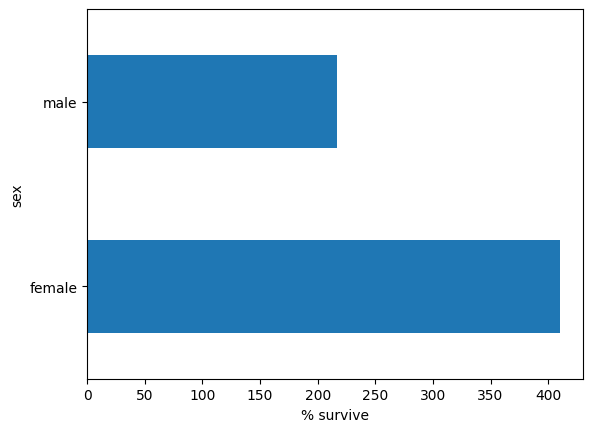

In [16]:
dftrain.sex.value_counts().plot(kind='barh')
dftrain['class'].value_counts().plot(kind='barh')


<Axes: >

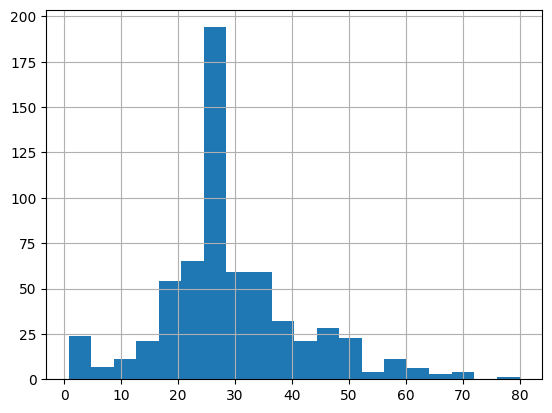

In [15]:
dftrain.age.hist(bins=20)

Text(0.5, 0, '% survive')

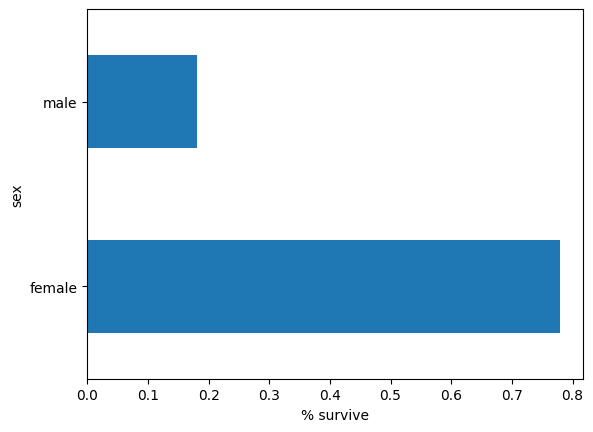

In [17]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind= 'barh').set_xlabel('% survive')

In [18]:
dfeval.shape

(264, 9)

In [ ]:
from tensorflow.python import feature_column
CATEGORICAL_COLUMNS = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']

NUMERIC_COLUMNS = ['age','fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


print(feature_columns)


In [21]:
def make_input_fn(data_df, label_df, num_epochs=10,shuffle=True, batch_size=32):
  def input_function():
    ds =tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs =1 , shuffle = False)

#creating the model

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)


#training the model

linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])
print(result)

0.7537879
{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.8344352, 'auc_precision_recall': 0.78280777, 'average_loss': 0.49023882, 'label/mean': 0.375, 'loss': 0.48483822, 'precision': 0.64912283, 'prediction/mean': 0.4303185, 'recall': 0.74747473, 'global_step': 200}


In [30]:
#making predictions
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[4]['probabilities'][1])#index one represent they survived


sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.29848355
